# Group by Time Effects

Kendra Wyant  
October 25, 2024

### Set Up Environment

In [ ]:
#| message: false
#| warning: false

# handle conflicts
options(conflicts.policy = "depends.ok")
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_ml.R?raw=true")

ℹ SHA-1 hash of file is "77e91675366f10788c6bcb59fa1cfc9ee0c75281"

In [ ]:
#| message: false
#| warning: false

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(library(tidyposterior))
library(kableExtra, exclude = "group_rows")
library(Rcpp, exclude = "populate")
library(brms, exclude = c("ar", "mixture"))

Loading 'brms' package (version 2.22.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

In [ ]:
#| output: false

devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true")

ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

ℹ SHA-1 hash of file is "6e9288d22f09da9ec15a1d5c046a0b6736ecce8b"

In [ ]:
path_processed <- format_path(str_c("studydata/risk/data_processed/lag"))
path_models_lag <- format_path(str_c("studydata/risk/models/lag"))

### Read in Model Performance Metrics

In [ ]:
auroc_dem_0 <- read_csv(here::here(path_models_lag, "test_auroc_dem_6_x_5_1week_0_v1_nested.csv"),
                      col_types = cols()) |> 
  mutate(fold_num = rep(1:10, 3),
         repeat_num = c(rep(1, 10), rep(2, 10), rep(3, 10))) |> 
  select(-outer_split_num)


auroc_dem_24 <- read_csv(here::here(path_models_lag, "test_auroc_dem_6_x_5_1week_24_v1_nested.csv"),
                      col_types = cols()) |> 
  mutate(fold_num = rep(1:10, 3),
         repeat_num = c(rep(1, 10), rep(2, 10), rep(3, 10))) |> 
  select(-outer_split_num)

auroc_dem_72 <- read_csv(here::here(path_models_lag, "test_auroc_dem_6_x_5_1week_72_v1_nested.csv"),
                      col_types = cols()) |> 
  mutate(fold_num = rep(1:10, 3),
         repeat_num = c(rep(1, 10), rep(2, 10), rep(3, 10))) |> 
  select(-outer_split_num)

auroc_dem_168 <- read_csv(here::here(path_models_lag, "test_auroc_dem_6_x_5_1week_168_v1_nested.csv"),
                      col_types = cols()) |> 
  mutate(fold_num = rep(1:10, 3),
         repeat_num = c(rep(1, 10), rep(2, 10), rep(3, 10))) |> 
  select(-outer_split_num)

auroc_dem_336 <- read_csv(here::here(path_models_lag, "test_auroc_dem_6_x_5_1week_336_v1_nested.csv"),
                      col_types = cols()) |> 
  mutate(fold_num = rep(1:10, 3),
         repeat_num = c(rep(1, 10), rep(2, 10), rep(3, 10))) |> 
  select(-outer_split_num)

In [ ]:
auroc_dem_all <- auroc_dem_0 |> 
  mutate(lag = 0) |> 
  bind_rows(auroc_dem_24 |> 
              mutate(lag = 24)) |>
  bind_rows(auroc_dem_72 |> 
              mutate(lag = 72)) |>
  bind_rows(auroc_dem_168 |> 
              mutate(lag = 168)) |>
  bind_rows(auroc_dem_336 |> 
              mutate(lag = 336))

set.seed(101)

### Race

In [ ]:
data <- auroc_dem_all |> 
  select(id = repeat_num, id2 = fold_num, `not white`, `non-hispanic white` = white, lag) |> 
  pivot_longer(cols = c(`not white`, `non-hispanic white`), names_to = "race", values_to = "auroc") |>
  mutate(race = factor(race)) |>
  glimpse()

Rows: 300
Columns: 5
$ id    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2…
$ id2   <int> 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 1,…
$ lag   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ race  <fct> not white, non-hispanic white, not white, non-hispanic white, no…
$ auroc <dbl> 0.9398942, 0.9117413, 0.3332944, 0.9060419, 0.7679709, 0.8649606…

Compiling Stan program...

Start sampling


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000116 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.16 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 3000 [  0%]  (Warmup)
Chain 1: Iteration:  300 / 3000 [ 10%]  (Warmup)
Chain 1: Iteration:  600 / 3000 [ 20%]  (Warmup)
Chain 1: Iteration:  900 / 3000 [ 30%]  (Warmup)
Chain 1: Iteration: 1200 / 3000 [ 40%]  (Warmup)
Chain 1: Iteration: 1500 / 3000 [ 50%]  (Warmup)
Chain 1: Iteration: 1501 / 3000 [ 50%]  (Sampling)
Chain 1: Iteration: 1800 / 3000 [ 60%]  (Sampling)
Chain 1: Iteration: 2100 / 3000 [ 70%]  (Sampling)
Chain 1: Iteration: 2400 / 3000 [ 80%]  (Sampling)
Chain 1: Iteration: 2700 / 3000 [ 90%]  (Sampling)
Chain 1: Iteration: 3000 / 3000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 18.16 seconds (Warm-up)
Chain 1:                53.354 seconds (Sampling)
Chain 1:                71

https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.

https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded

Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat

Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess

Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess

careful when analysing the results! We recommend running more iterations and/or
setting stronger priors.

adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup

 Family: gaussian 
  Links: mu = logit; sigma = identity 
Formula: auroc ~ 1 + race + lag + race * lag + (1 | id2/id) 
   Data: data (Number of observations: 283) 
  Draws: 4 chains, each with iter = 3000; warmup = 1500; thin = 10;
         total post-warmup draws = 600

Multilevel Hyperparameters:
~id2 (Number of levels: 10) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     2.00      2.97     0.04     8.24 1.31       11      330

~id2:id (Number of levels: 30) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     2.20      3.95     0.00     9.10 1.23       21       18

Regression Coefficients:
                           Estimate          Est.Error           l-95% CI
Intercept        247988884235823.12 469991777588376.88               2.78
racenotwhite      -5280707081408.61  10997544693548.11 -38397908279077.39
lag                  87213786813.73    189549568145.12         -572121.26
racenotwhite:lag  -4

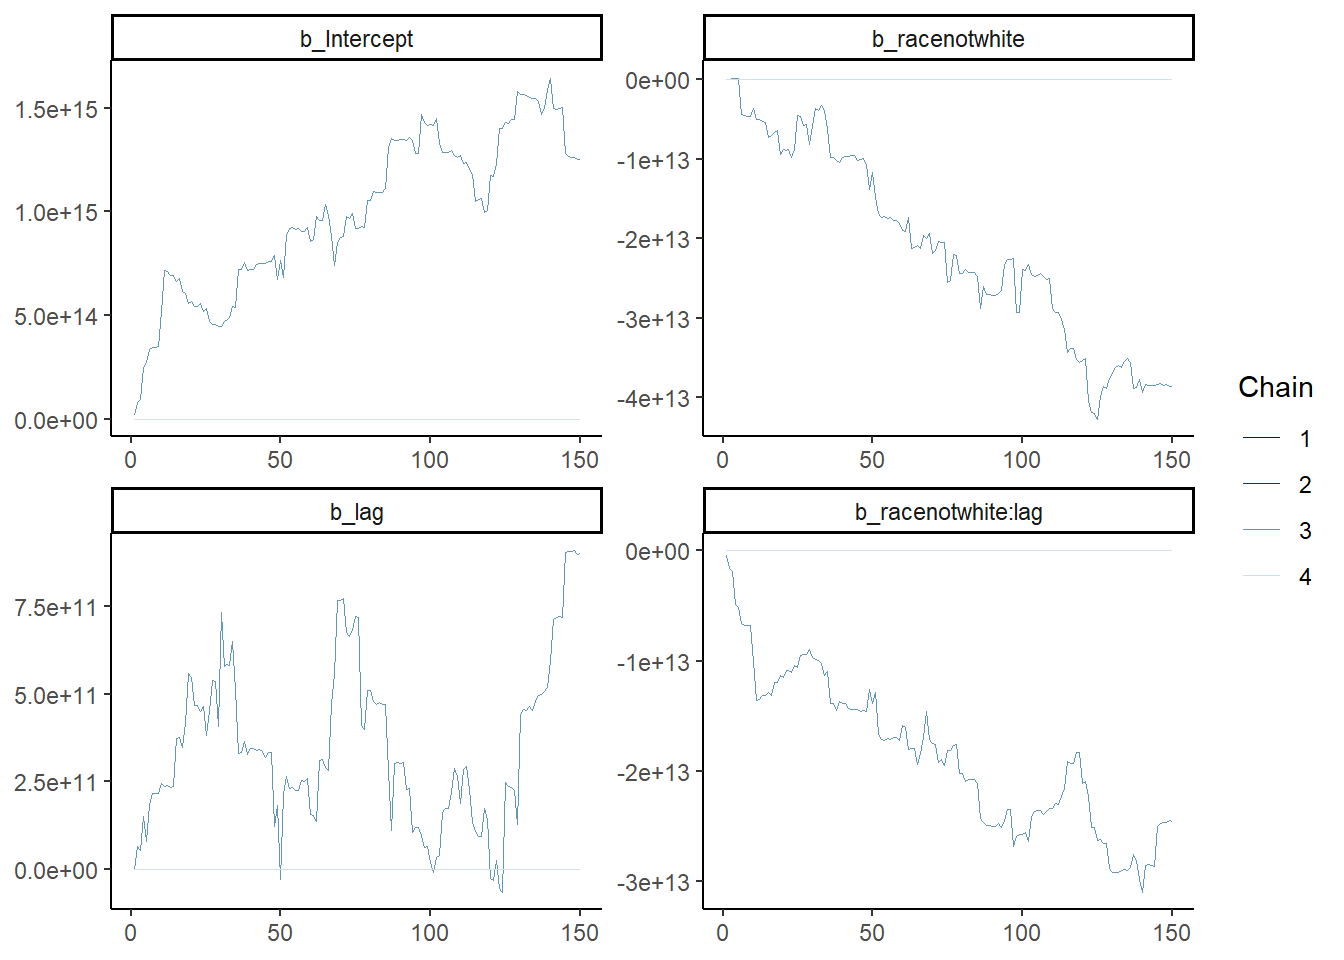

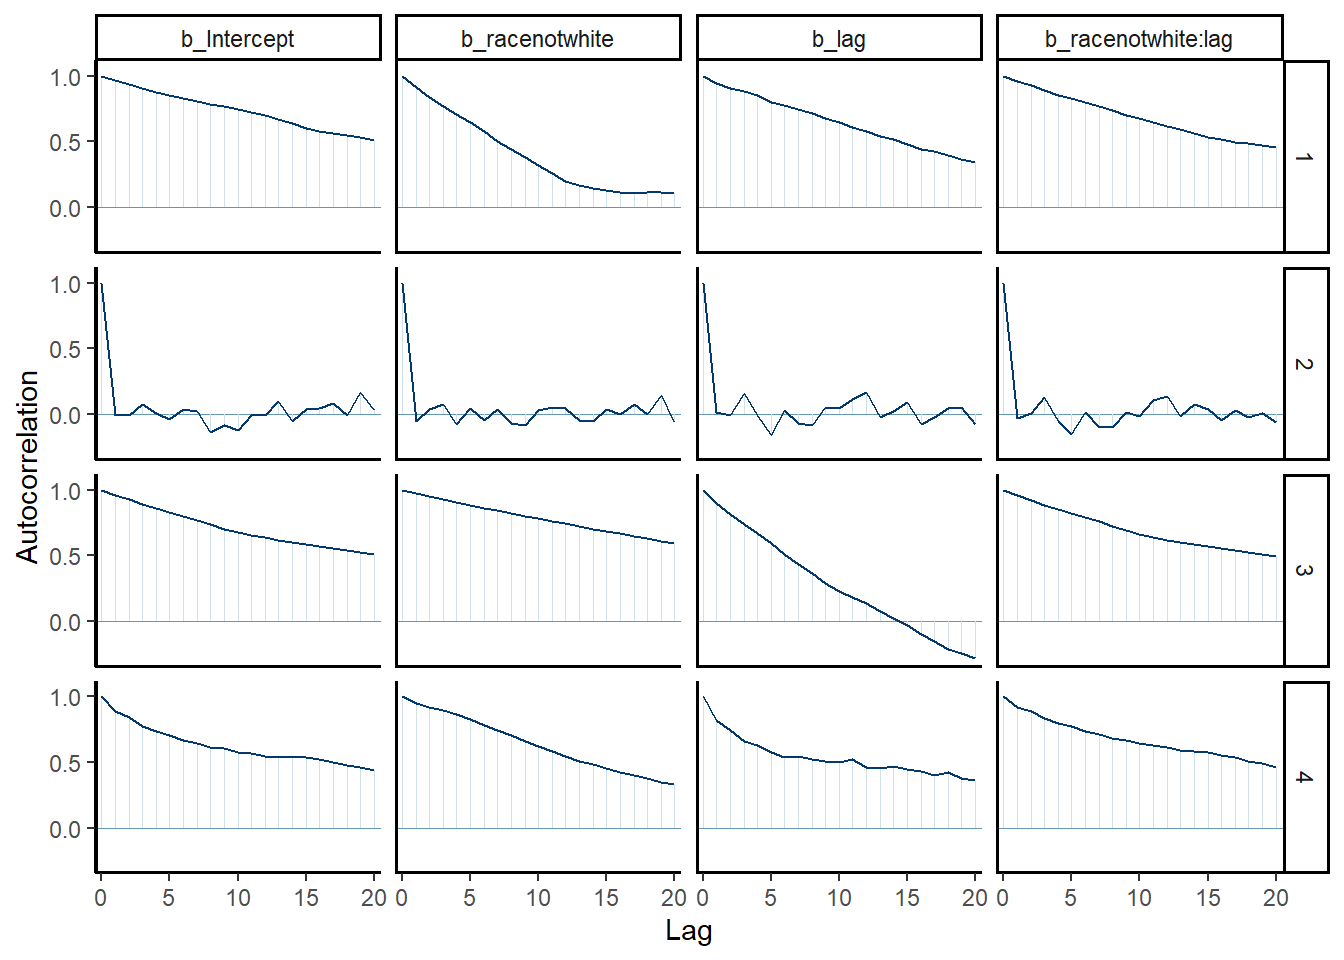

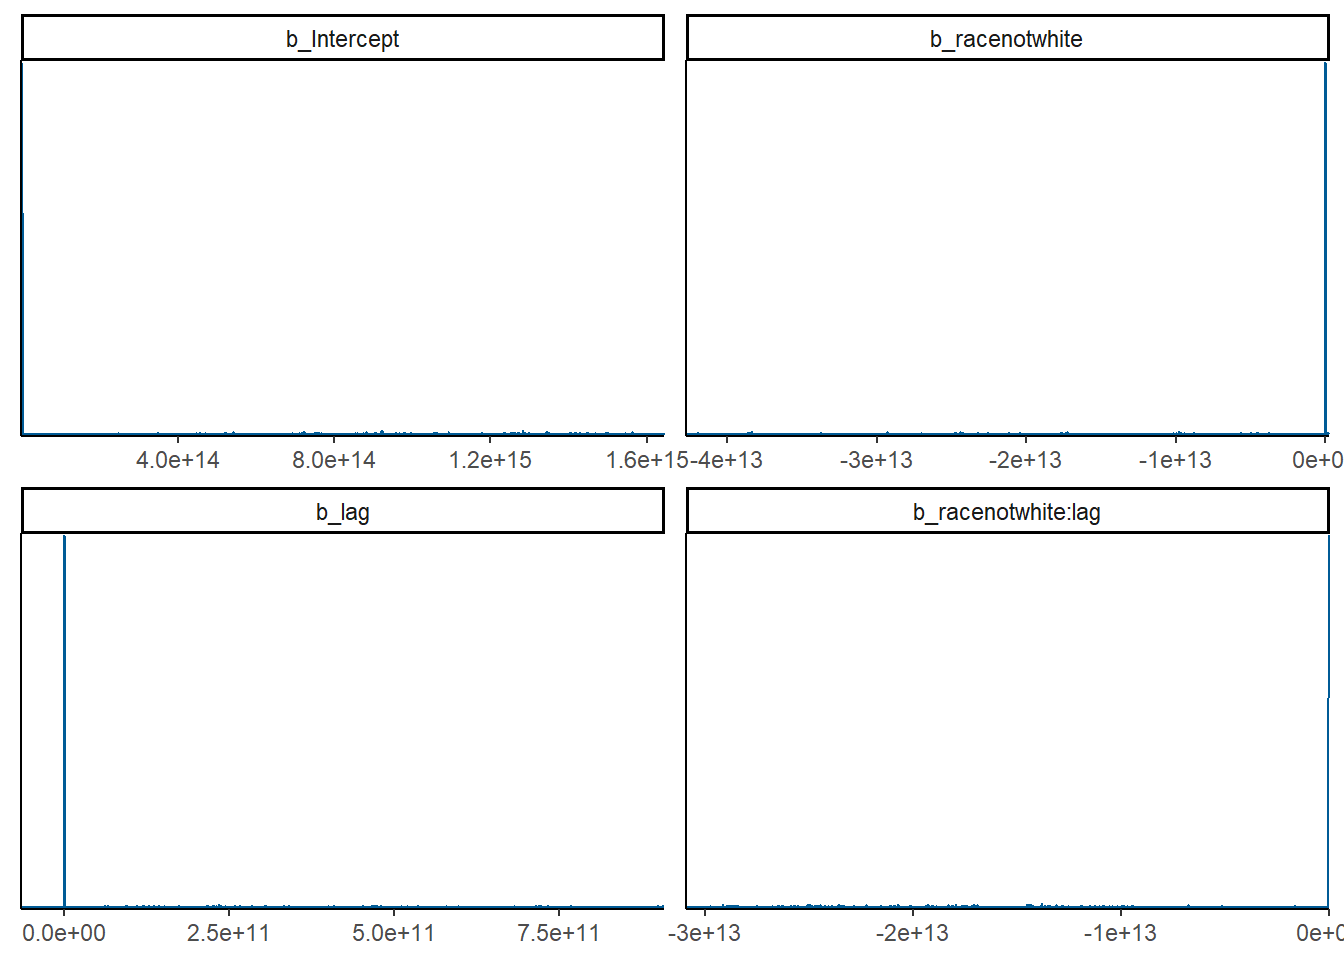

In [ ]:
bayesplot::mcmc_trace(model_race, pars = c("b_Intercept", "b_racenotwhite", "b_lag", "b_racenotwhite:lag"))

### Sex

In [ ]:
data <- auroc_dem_all |> 
  select(id = repeat_num, id2 = fold_num, female, male, lag) |> 
  pivot_longer(cols = c(female, male), names_to = "sex", values_to = "auroc") |>
  mutate(sex = factor(sex)) |>
  glimpse()

Rows: 300
Columns: 5
$ id    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2…
$ id2   <int> 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 1,…
$ lag   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ sex   <fct> female, male, female, male, female, male, female, male, female, …
$ auroc <dbl> 0.8717134, 0.9537088, 0.7873624, 0.9585205, 0.8616866, 0.8588775…

Compiling Stan program...

Start sampling


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000111 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 6000 [  0%]  (Warmup)
Chain 1: Iteration:  600 / 6000 [ 10%]  (Warmup)
Chain 1: Iteration: 1200 / 6000 [ 20%]  (Warmup)
Chain 1: Iteration: 1800 / 6000 [ 30%]  (Warmup)
Chain 1: Iteration: 2400 / 6000 [ 40%]  (Warmup)
Chain 1: Iteration: 3000 / 6000 [ 50%]  (Warmup)
Chain 1: Iteration: 3001 / 6000 [ 50%]  (Sampling)
Chain 1: Iteration: 3600 / 6000 [ 60%]  (Sampling)
Chain 1: Iteration: 4200 / 6000 [ 70%]  (Sampling)
Chain 1: Iteration: 4800 / 6000 [ 80%]  (Sampling)
Chain 1: Iteration: 5400 / 6000 [ 90%]  (Sampling)
Chain 1: Iteration: 6000 / 6000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 99.063 seconds (Warm-up)
Chain 1:                106.226 seconds (Sampling)
Chain 1:                

https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.

https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded

Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat

Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess

Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess

careful when analysing the results! We recommend running more iterations and/or
setting stronger priors.

adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup

 Family: gaussian 
  Links: mu = logit; sigma = identity 
Formula: auroc ~ 1 + sex + lag + sex * lag + (1 | id2/id) 
   Data: data (Number of observations: 300) 
  Draws: 4 chains, each with iter = 6000; warmup = 3000; thin = 10;
         total post-warmup draws = 1200

Multilevel Hyperparameters:
~id2 (Number of levels: 10) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     2.70      3.66     0.01    12.68 1.53        7       32

~id2:id (Number of levels: 30) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.78      2.18     0.19     7.12 1.31       11      192

Regression Coefficients:
             Estimate Est.Error   l-95% CI   u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   242267.80 481775.29       1.69 1627228.90 3.27        5       13
sexmale     -86003.58 157073.47 -498784.22       0.77 2.85        5       12
lag          -3104.07   6245.03  -21709.45      -0.00 3.27        5       13
sexmale:l

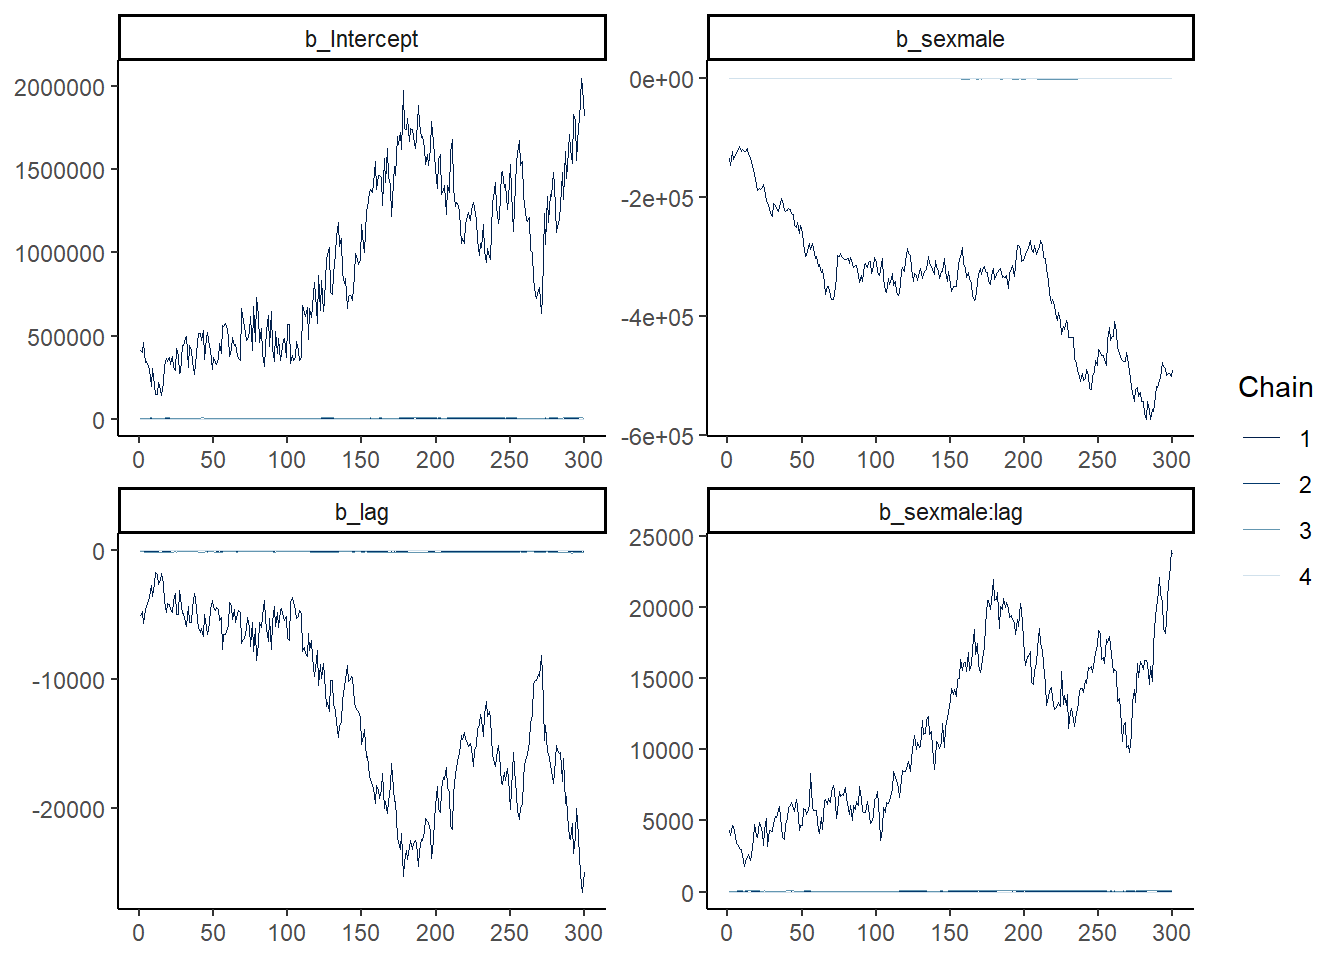

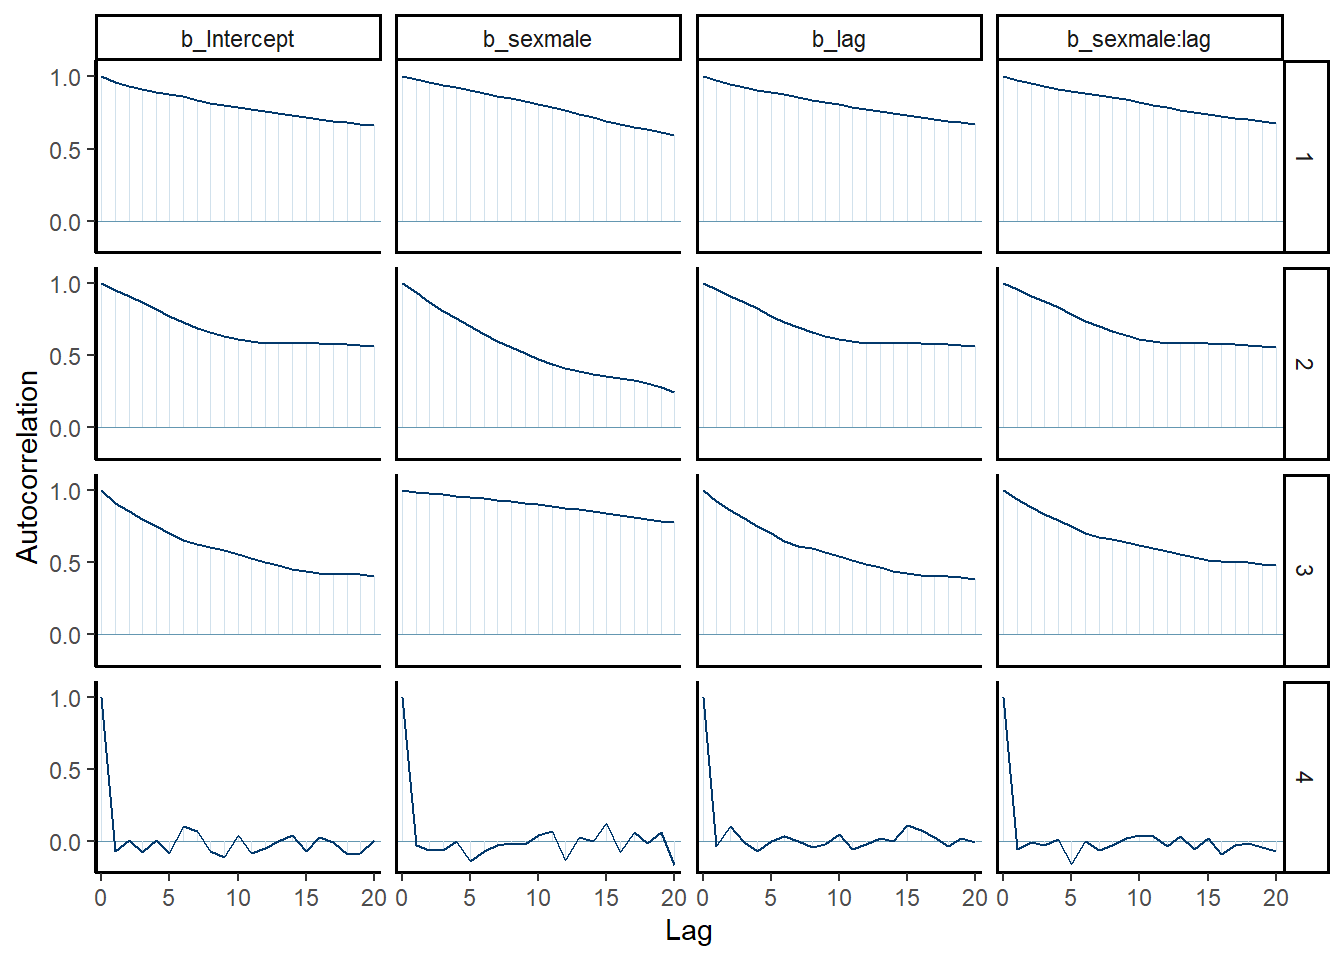

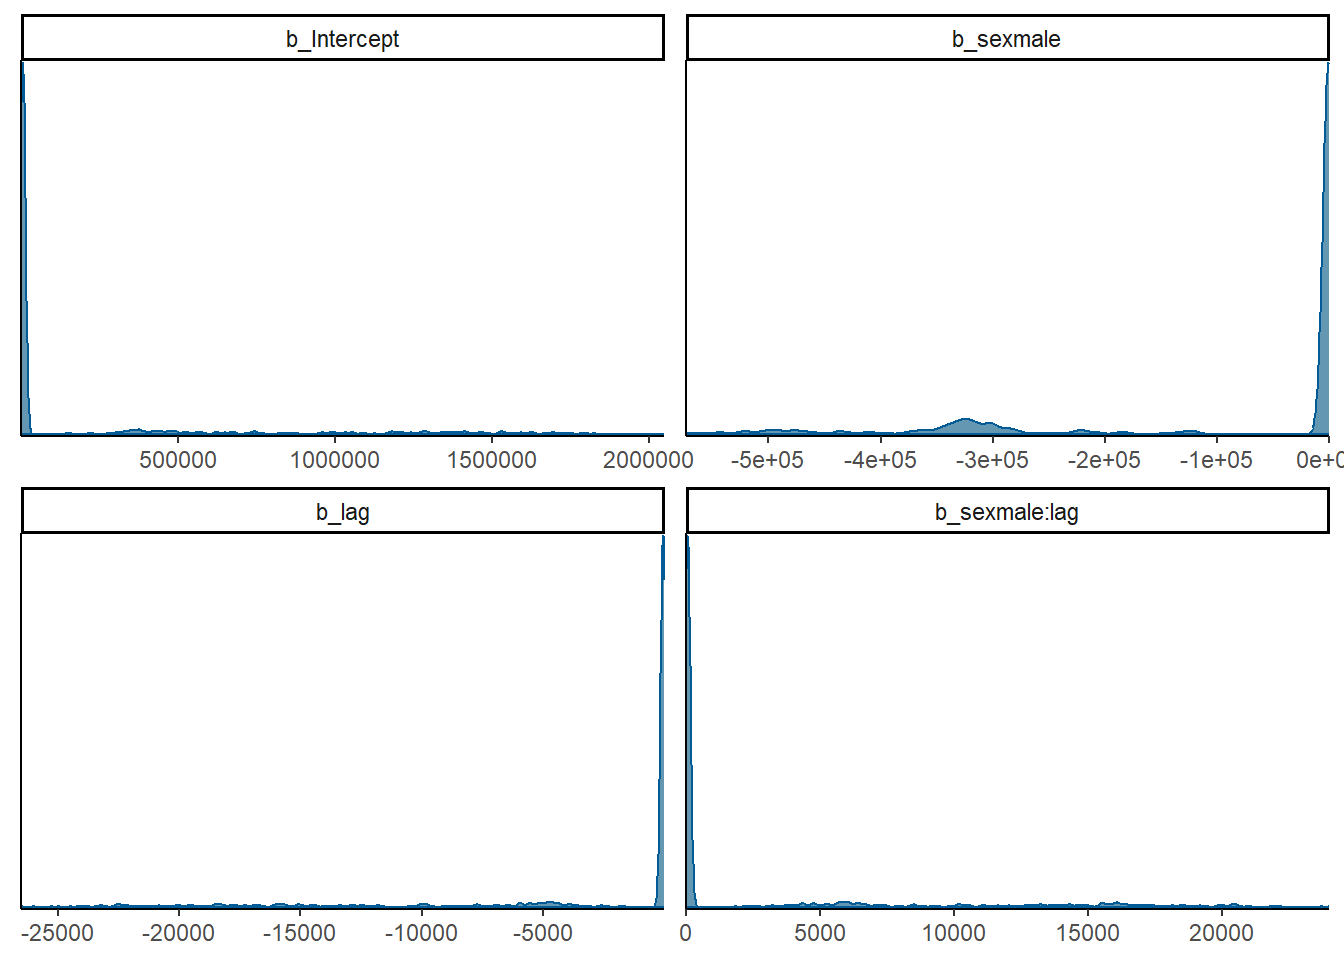

In [ ]:
bayesplot::mcmc_trace(model_sex, pars = c("b_Intercept", "b_sexmale", "b_lag", "b_sexmale:lag"))